# Cuaderno de Regresión

Con este cuaderno se estudiarán métodos de regresión empleando diferentes técnicas para calcular la regresión. También se eplearán modelos pre existentes en la librería scikit-learn
para analizar el dataset ice_cream_revenue

## Sección 1: Uso del algoritmo de mínimos cuadrados para encontrar un modelo
En la primera sección se emplearán modelos de regresión encontrados con el método de mínimos cuadrados que se basa en encontrar la solución óptima para un problema de la forma
$$ Ax=b $$ y puede ser resuelto con álgebra lineal.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt


## Análisis y  Regresión del dataset Pearson
### 1. Análisis exploratorio de los datos



In [3]:
import pandas as pd
import sklearn
import seaborn as sns


In [5]:
df= pd.read_csv("/content/drive/MyDrive/TALENTO TECH/data/Pearson.csv")
df

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


In [6]:
df.info
df.describe()

,Father,Son
count,1078.000000,1078.000000
mean,67.686827,68.684230
std,2.745827,2.816194
min,59.000000,58.500000
25%,65.800000,66.900000
50%,67.800000,68.600000
75%,69.600000,70.500000
max,75.400000,78.400000


In [7]:
df.describe()

,Father,Son
count,1078.000000,1078.000000
mean,67.686827,68.684230
std,2.745827,2.816194
min,59.000000,58.500000
25%,65.800000,66.900000
50%,67.800000,68.600000
75%,69.600000,70.500000
max,75.400000,78.400000


##2 Preparando los datos


In [8]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df[["Father"]]
y = df["Son"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(808, 1)


###3 modelo de regresión lineal
Emplearemos el modelo `LinearRegression` de scikit-learn para ajustar los datos

In [9]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")


La pendiente del modelo (B) es: [0.49329072], el intersecto (A) es 35.265001238401354


### 2.4 Evaluación del modelo

Text(0.5, 1.0, 'estatura del hijo respecto a la del padre')

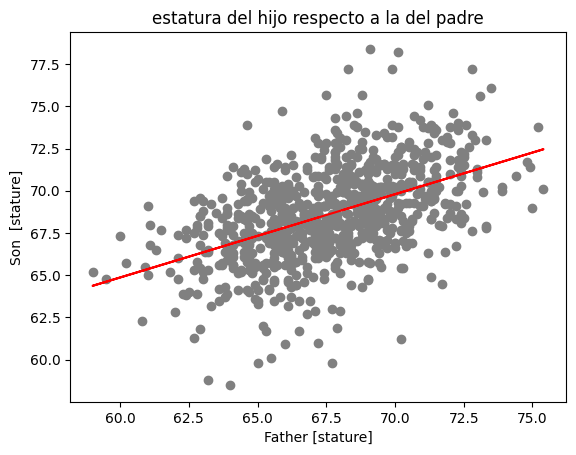

In [10]:
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Son  [stature]')
plt.xlabel('Father [stature]')
plt.title('estatura del hijo respecto a la del padre')

Text(0.5, 1.0, 'estatura del hijo respecto a la del padre')

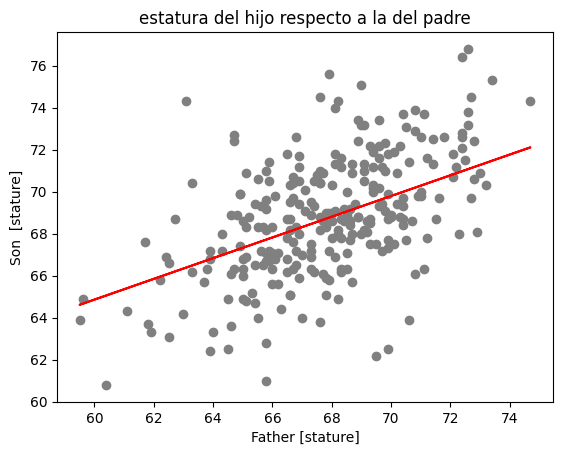

In [11]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Son  [stature]')
plt.xlabel('Father [stature]')
plt.title('estatura del hijo respecto a la del padre')



### Error medio cuadrático
Es una de las medidas más empleadas como función de pérdida en los algoritmos de regresión. Mide la distancia cuadrática entre una predicción del modelo respecto al dato correspondiente en el conjunto de datos para todos los puntos que tenga el conjunto de datos. Luego calcula el promedio de esas distancias.



In [12]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))



Mean Squared Error: 5.983160018019948
Root Mean Squared Error: 2.4460498805257322


# Error medio absoluto
Es la diferencia entre los valores estimados y los reales. Se calcula el promedio de todas las diferencias para encontrar el valor del error

In [13]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

print(f"Error Absoluto Medio (MAE): {mae}")

Error Absoluto Medio (MAE): 1.9186058542309377



## Tarea:

Error cuadratico medio == mse (mean squared error)

```
# Error medio absoluto == mae (mean_absolute_error)

absolute = abs() en Python

| x | = +x, si x>=0
| x | = -x, si x<=0

Ejemplo:
| (5) | = +(5) = +5 = 5
| (-5) | = -(-5) = +5 = 5

15 = | 40 - 25 | = | 15 | = 15
15 = | 25 - 40 | = | -15 | = -(-15)= 15

def get_mean_absolute_error(y_real, y_pred):
  mae = | (y_real) - (y_pred) |
  # mae = | (y_pred) - (y_real) |
  return mae
```


RECORDAR HACER LA GRÁFICA DE LA DISTRUBUCIÓN DE LOS RESIDUOS (histograma de error)


In [14]:
# Calcular el error cuadrático medio (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")

Error Cuadrático Medio (MSE): 5.983160018019948


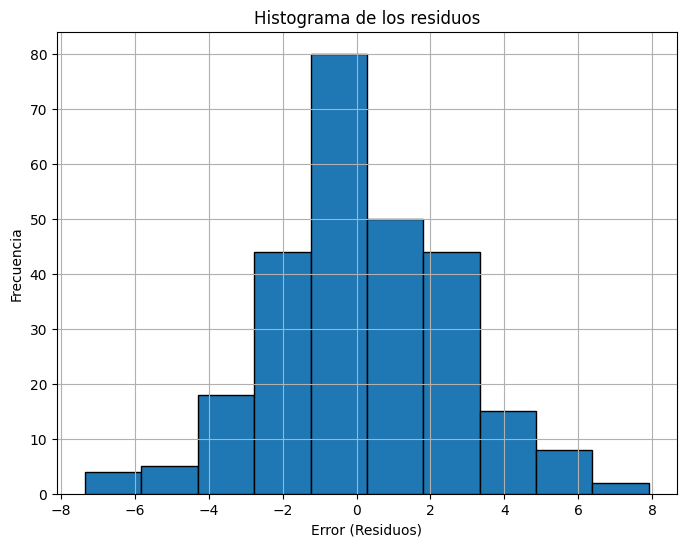

In [15]:
# Calcular los residuos
residuos = y_test - y_pred

# Crear un histograma de los residuos
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=10, edgecolor='black')
plt.title("Histograma de los residuos")
plt.xlabel("Error (Residuos)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1.9186058542309377


### R cuadrado
Es una medida estadística que indica que tan cerca estan los datos de ajustarse a una línea recta. Se conoce también como el coeficiente de determinación.

In [17]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.284689125231787
